# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+3$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+2$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

In [1]:
# useful functions to find all possible assigments of classes:
# (I recommend usin combinations, as we don't need to compute the same with the classes swiched)
import matplotlib.pyplot as plt
from itertools import combinations
#from itertools import permutations
# from itertools import product
import numpy as np
from sklearn import svm
from sklearn import tree

### b)

In [2]:
# S_n is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered(S):
    d = S.shape[1]
    n = S.shape[0]
    for k in range(1,n): # no need to consider reversed classes, for some reason changing n to int(np.ceil(n/2 + 1)) raises random error
        for comb in combinations(np.arange(n),k):
            y = np.zeros(n)
            y[list(comb)] = 1
            svc = svm.SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
            if svc.fit(S, y).score(S, y) != 1:
                return False
    return True
    
#     for y in different assigment of classes to points in S_n:
#         check if they are linearly separable
#         i.e. if we can fit a line so for the points in S_n with classes y the classification error is 0

#     if for at least for one y the answer is no, then return False, else return True
#     return True/False

### c)

False


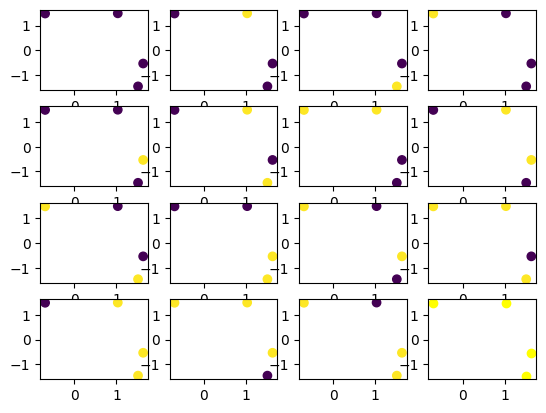

In [3]:
S = np.random.randn(8).reshape(4,2)
i = 1
plt.subplot(4,4,i)
for k in range(4):
    for comb in combinations(np.arange(4),k):
        y = np.zeros(4)
        y[list(comb)] = 1
        plt.subplot(4,4,i)
        i += 1
        plt.scatter(S[:,0], S[:,1], c= y)
plt.subplot(4,4,i)
plt.scatter(S[:,0], S[:,1], c= "yellow")
print(is_shattered(S))

In [6]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

### d)

In [5]:
# -1 means there was a bug
VC = -np.ones(9)
for d in range(2,11):
    # we know that the actual value is d + 2
    ns = np.arange(d + 2 - 3, d + 2 + 4)
    for n in ns:
        # to avoid negative shape
        if n > 0:
            break_flag = 0
            for i in range(50):
                S = np.random.randn(d*n).reshape(n,d)
                if is_shattered(S):
                    # this means that VC dimension is at least n + 1
                    # estimated V-C
                    VC[d-2] = n + 1
                    # no need to do remaing ~50 simulations
                    break_flag = 1
                    break
            # for efficiency
            if break_flag == 0:
                break

In [6]:
# we expect 4, 5, ..., 12
VC

array([ 4.,  5.,  6.,  7.,  8.,  9., 10.])

### e)

In [9]:
# what it actually does is find the VC dimension of all balls B(x, r) in R^d and R^d/B(x,r)

In [2]:
# A hint: change a kernel in SVM
def custom_kernel(X, Y):
      return np.dot(np.concatenate((np.ones(X.shape[0]).reshape(-1,1), X, np.sum(X**2, axis=1).reshape(-1,1)),axis=1),
                    np.concatenate((np.ones(Y.shape[0]).reshape(-1,1), Y, np.sum(Y**2, axis=1).reshape(-1,1)),axis=1).T)

def is_shattered_ball(S):
    d = S.shape[1]
    n = S.shape[0]
    for k in range(1,int(np.ceil(n/2 + 1))):
        for comb in combinations(np.arange(n),k):
            y = np.zeros(n)
            y[list(comb)] = 1
            svc = svm.SVC(kernel = custom_kernel, tol =1e-10, C = 10000)
            if svc.fit(S, y).score(S, y) != 1:
                return False
    return True

False


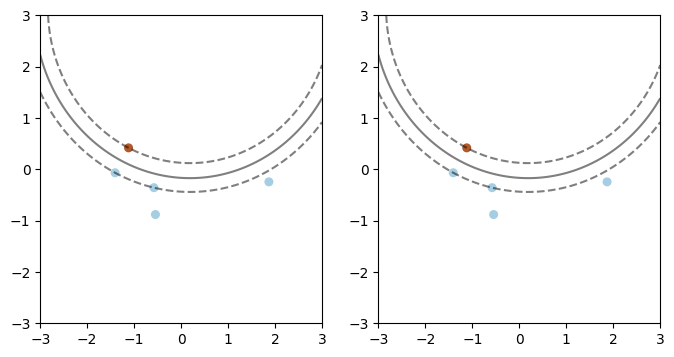

In [3]:
dim = 5
S = np.random.randn(2*dim).reshape(dim,2)
y = [1,0,0,0,0]


svc  = svm.SVC(kernel=custom_kernel, C = 10000)
svc.fit(S, y)
def plot_balls(svc, S, y):
    # Create meshgrid to plot decision surface
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                         np.linspace(-3, 3, 500))
    # Evaluate decision function on meshgrid
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot decision boundary and support vectors
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.scatter(S[:, 0], S[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_balls(svc, S, svc.predict(S))
plt.subplot(1,2,2)
plot_balls(svc, S, y)

print(is_shattered_ball(S))

In [4]:
# -1 means there was a bug
VC = -np.ones(7)
for d in range(2,9):
    # we expect the actual value to be around d + 3 (considering different set F)
    ns = np.arange(d + 3 - 3, d + 3 + 4)
    for n in ns:
        # to avoid negative shape
        if n > 0:
            break_flag = 0
            for i in range(50):
                S = np.random.randn(d*n).reshape(n,d)
                if is_shattered_ball(S):
                    # this means that VC dimension is at least n + 1
                    # estimated V-C
                    VC[d-2] = n + 1
                    # no need to do remaing ~50 simulations
                    break_flag = 1
                    break
            # for efficiency
            if break_flag == 0:
                break

In [5]:
# computationally tractable for d <= 8
VC

array([ 5., -1., -1., -1., -1., -1., -1.])

In [6]:
# since algoritm is very efficient we get rid of range(50) loop
# -1 means there was a bug
VC = -np.ones(7)
for d in range(2,9):
    # we expect the actual value to be around d + 3 (considering different set F)
    ns = np.arange(d + 3 - 3, d + 3 + 4)
    for n in ns:
        # to avoid negative shape
        if n > 0:
            break_flag = 0
            S = np.random.randn(d*n).reshape(n,d)
            if is_shattered_ball(S):
                # this means that VC dimension is at least n + 1
                # estimated V-C
                VC[d-2] = n + 1
                # no need to do remaing ~50 simulations
                break_flag = 1
            # for efficiency
            if break_flag == 0:
                break

-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0


In [7]:
VC

array([ 5.,  6.,  7.,  8.,  9., 10., 11.])

In [8]:
# S_n is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered_tree(S):
    d = S.shape[1]
    n = S.shape[0]
    for k in range(1,int(np.ceil(n/2 + 1))):
        for comb in combinations(np.arange(n),k):
            y = np.zeros(n)
            y[list(comb)] = 1
            decision = tree.DecisionTreeClassifier()
            if decision.fit(S, y).score(S, y) != 1:
                return False
    return True

In [9]:
# Since pure tree is always gonna give the right answer, it doesn't make much sense to estimate V-C = inf
# We expect S to be shattered regardless of n and d
n = 15
d = 8
S = np.random.randn(n*d).reshape(n,d)
y = np.random.randint(n)
is_shattered_tree(S)

True

In [10]:
# S_n is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered_tree_pruned(S, alpha):
    d = S.shape[1]
    n = S.shape[0]
    for k in range(1,int(np.ceil(n/2 + 1))):
        for comb in combinations(np.arange(n),k):
            y = np.zeros(n)
            y[list(comb)] = 1
            decision = tree.DecisionTreeClassifier(ccp_alpha = alpha)
            if decision.fit(S, y).score(S, y) != 1:
                return False
    return True

In [63]:
def VC_tree_pruned(max_d, alpha):   
    VC = -np.ones(max_d-2)
    for d in range(2,max_d):
        # we expect the actual value to be around d + 3 (considering different set F)
        ns = np.arange(1, d + 5)
        for n in ns:
            # to avoid negative shape
            if n > 0:
                break_flag = 0
                for i in range(50):
                    S = np.random.randn(d*n).reshape(n,d)
                    if is_shattered_tree_pruned(S, 0.1): 
                        # this means that VC dimension is at least n + 1
                        # estimated V-C
                        VC[d-2] = n + 1
                        # no need to do remaing ~50 simulations
                        break_flag = 1
                        break
                # for efficiency
                if break_flag == 0:
                    break
    return VC

In [64]:
VC_tree_pruned(10,1)

array([ 7.,  8.,  9.,  9.,  9., 12., 12., 12.])

In [65]:
VC_tree_pruned(10,3)

array([ 7.,  8.,  9.,  9., 10., 11., 11., 12.])

In [66]:
VC_tree_pruned(10,0.1)

array([ 7.,  8.,  9., 10., 10., 11., 12., 12.])

In [67]:
VC_tree_pruned(15,0.1)

array([ 7.,  8.,  8.,  9., 11., 11., 12., 12., 12., 12., 13., 13., 13.])

In [68]:
VC_tree_pruned(15,5)

array([ 7.,  8.,  9., 10., 11., 10., 12., 12., 12., 12., 12., 13., 13.])